In [1]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

In [2]:
# Dataset
data = pd.DataFrame({
    'Siswa': [1, 2, 3, 4, 5],
    'DTW': [2, 3, 4, 1, 5],
    'DTT': [4, 4, 2, 5, 2],
    'DMT': [4, 3, 5, 4, 2],
    'DDB': [3, 5, 4, 2, 3]
}).set_index('Siswa')

# Tampilkan dataset
data

,DTW,DTT,DMT,DDB
Siswa,,,,
1,2,4,4,3
2,3,4,3,5
3,4,2,5,4
4,1,5,4,2
5,5,2,2,3


In [3]:
# Hitung jarak Manhattan
manhattan_dist = pdist(data, metric='cityblock')
manhattan_dist_matrix = squareform(manhattan_dist)

# Tampilkan matriks jarak
pd.DataFrame(manhattan_dist_matrix, index=data.index, columns=data.index)

Siswa,1,2,3,4,5
Siswa,,,,,
1,0.0,4.0,6.0,3.0,7.0
2,4.0,0.0,6.0,7.0,7.0
3,6.0,6.0,0.0,9.0,5.0
4,3.0,7.0,9.0,0.0,10.0
5,7.0,7.0,5.0,10.0,0.0


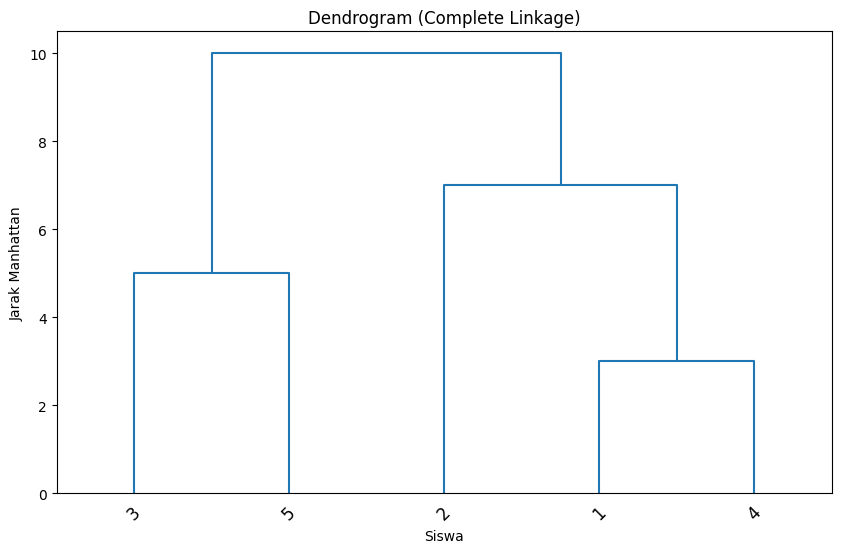

In [4]:
# AHC dengan Complete Linkage
complete_linkage = linkage(manhattan_dist, method='complete')

# Visualisasi dendrogram
plt.figure(figsize=(10, 6))
dendrogram(complete_linkage, labels=data.index, color_threshold=0, leaf_rotation=45)
plt.title("Dendrogram (Complete Linkage)")
plt.xlabel("Siswa")
plt.ylabel("Jarak Manhattan")
plt.show()

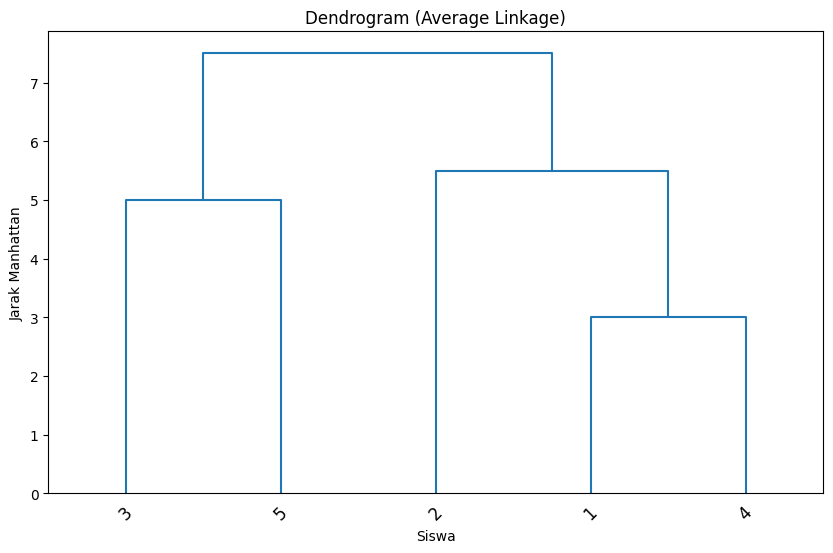

In [5]:
# AHC dengan Average Linkage
average_linkage = linkage(manhattan_dist, method='average')

# Visualisasi dendrogram
plt.figure(figsize=(10, 6))
dendrogram(average_linkage, labels=data.index, color_threshold=0, leaf_rotation=45)
plt.title("Dendrogram (Average Linkage)")
plt.xlabel("Siswa")
plt.ylabel("Jarak Manhattan")
plt.show()